In [3]:
library(tidyverse)
library(kohonen)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



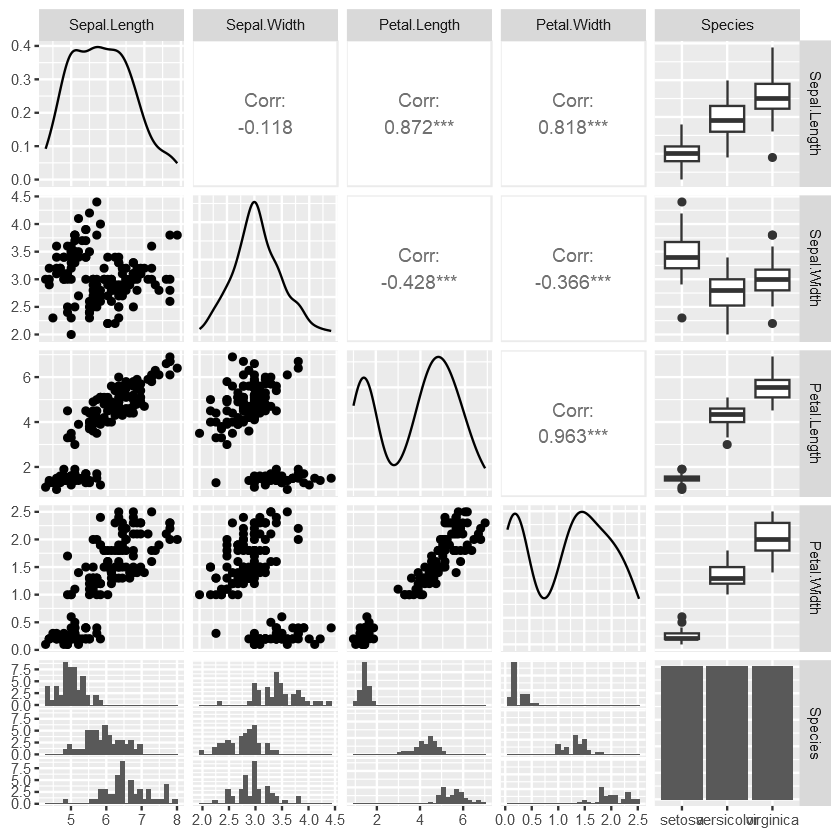

In [53]:
library(GGally)
ggpairs(iris)
# ggduo(iris)

### 1. 들어가기

- 자기조직화지도(Self-organizing map, SOM)는 대뇌피질의 시각피질을 모델화한 인공신경망의 일종입니다. 
- 또한 SOM 모델은 차원축소(dimensionality reduction)와 군집화(clustering)를 동시에 수행하는 분류기법으로 사용되는 알고리즘입니다.

### 2-1. SOM 모델 알고리즘의 학습단계

- SOM이란 사람이 눈으로 볼 수 있는 저차원(2차원 내지 3차원) 격자에 고차원 데이터의 각 개체들이 대응하도록 인공신경망과 유사한 방식의 학습을 통해 군집을 도출해내는 기법입니다. 
- 고차원의 데이터 원공간에서 유사한 개체들은 저차원에 인접한 격자들과 연결됩니다. 저차원 격자에서의 유사도는 고차원 입력 공간에서의 유사도를 최대한 보존하도록 학습됩니다.

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxOTA4MDdfMjYy/MDAxNTY1MTA0MTEwNzEx.4Hc2I1d9re5d8y1wwnUAcu-uCkvZX5ROv3xcR2YZoQIg.7uN89EV760_Yp1hMcR2PD8zFSL_JTUSbGGwsTyYOirIg.GIF.pmw9440/7.13_som1.gif?type=w800">


- SOM에는 오직 숫자형 데이터만 입력할 수 있으며 모델 파라미터는 거리 함수(보통의 경우, 유클리드 거리 사용), 그리고 격자 또는 래티스(lattice) 파라미트(폭과 높이 또는 래티스에 존재하는 셀의 수) 등을 사용합니다. som 알고리즘 학습방식은 초기에 가중치(그림 wij)는 랜덤값으로 생성되며 다음과 같이 세 단계의 과정을 거치게 됩니다.

#### ① 경쟁 단계 : 

- 이 단계의 각 뉴런의 가중치와 입력  데이터의 벡터간의 거리를 산출 및 비교하여 뉴런간의 경쟁을 벌입니다. 예를 들어 입력 데이터의 할당 여부를 결정할 때, 입력 데이터와 거리가 가까운 뉴런들을 선정합니다.

#### ② 협력 단계: 

- 경쟁에서 선정한 뉴런은 토폴로지 이웃(Topological neighborhood) 영역에서 가장 좋은 공간 위치를 차지하게 되며, 뉴런(j, i) 거리 Sij, 이웃 크기  σ일 때, 승리한 뉴런의 토폴로지 이웃은 다음과 같이 정의할 수 있습니다.

$
T_{j, I(x)} = exp(- {{s^2_{ij}} \over 2 \sigma(t)^2})
$

- 토폴로지 이웃의 크기(σ2(t))는 지수함수 등, 감쇄 함수(decay functions)들을 이용해서 다음과 같이 정의할 수 있습니다.

$
\sigma(t) = \sigma_0 exp(- {t \over t_0})
$

- 여기서 t는 학습 횟수(time-step)입니다.

#### ③ 적응 단계: 이 단계에서는 승리한 뉴런의 가중치와 토폴로지 이웃 뉴런을 업데이트를 하게 됩니다. 


- 원하는 학습횟수만큼 ② ~ ③을 반복하여 적용하여 가중치를 업데이트 합니다. 

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxOTA4MDdfMTEz/MDAxNTY1MTI5NzE3MjY4.CEVMVarpfz2nXZjTLQGRICLWKy3Cde4OPLNphRyPr6gg.K3FEpfS_8GZFtQpMpHPPcG4_j2xWexDL7FGI6zxLh-kg.GIF.pmw9440/7.13_som2.gif?type=w800">

### 2-2. SOM 모델의 장점 및 단점


- SOM의 최대 장점은 통합거리매트릭스(Unified Distance Matrix, U-Matrix)를 이용하여 손쉽게 2차원 데이터의 클러스터를 생성하고 데이터가 암시하는 패턴, 흥미로운 사실을 이해할 수 있음.

- 어떤 유사성/거리 함수를 선택하느냐에 따라 클러스터의 내용이 매우 크게 달라질 수 있음.

- SOM 모델의 수학 연산상의 복장성으로 인해 수천 개 이상의 데이터세트는 분석하는 것이 불가능함.

In [15]:
iris %>% glimpse
iris$Species %>% table

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.~
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.~
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.~
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.~
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s~


.
    setosa versicolor  virginica 
        50         50         50 

- SOM 모델을 적용하는 목적은 위의 "Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width" 수치형 4개를 독립변수로 이용하여 아이리스의 종류(Species)를 예측하는 것이 되겠습니다.

- 단위에 따라 표준화 필요

In [23]:
train <- sample(1:150, 100) #무작위로 100개 추출 (학습데이터)
train_Set <-  list(x = as.matrix(iris[train,-5]), Species = as.factor(iris[train,5])) #학습데이터 list형
test_Set <- list(x = as.matrix(iris[-train,-5]), Species = as.factor(iris[-train,5])) #테스트 데이터 list형

### ```somgrid()``` :
- ```xdim``` : x의 차원
- ```ydim``` : y의 차원
- ```topo``` : 형태 (```"hexagonal"```, ```"rectangular"```)



- gridsize 대략 5-10개의 샘플/노드. 육각형이 선호됩니다(더 많은 이웃).

In [56]:
gr <- somgrid(xdim = 3, # Species의 범주 수
              ydim = 5, # 데이터의 변수 수
              topo = "hexagonal", # grid 갯수 및 모양 설정
              toroidal = T) 

### ```supersom()```
- ```data``` : 학습할 데이터
- ```grid``` : 출력층 표현 (somgrid() 함수의 출력값)
- ```rlen``` : 학습횟수
- ```alpha``` : 학습계수
- ```radius``` : 뉴런의 반경
- ```init``` : 초기치
- ```torodial``` : map의 단말부 표현여부
- ```n.hood``` : 주변부 표현형태 (```"circular"```, ```"square"```)
- ```keep.data``` : 자료수용여부

In [57]:
ss <- supersom(train_Set, gr, rlen = 200, alpha = c(0.05, 0.01), keep.data = T) 
# som 학습하기

In [58]:
summary(ss)

SOM of size 3x5 with a hexagonaltoroidal topology and a bubble neighbourhood function.
The number of data layers is 2.
Distance measure(s) used: sumofsquares, tanimoto.
Training data included: 100 objects.
Mean distance to the closest unit in the map: 0.013.


In [65]:
meanD <- mean(ss$distances) 
# 코드와 지도에서 가장 가까운 각 단위 사이의 거리를 의미합니다.

meanunitD <- mean(unit.distances(gr)) 
# 단위 사이의 거리에 대한 단서를 제공합니다.

AccountedD <- meanunitD - meanD 
# MeanD는 지도를 사용할 때 "남은" 거리입니다
# 들어오는 거리와 완료했을 때 남은 거리의 차이는 우리가 계산한 거리입니다.
# 평균이 0이면(절대 발생하지 않음) 단위와 코드가 완벽하게 일치합니다.

EF <- AccountedD/meanunitD
# 매핑하기 전에 설명된 거리를 평균 거리로 나눕니다.
# 비율은 효율성에 대해 말해야 합니다.

- supersom() 함수의 rlen(학습횟수)을 200로 지정하였기 때문에 200회 SOM 알고리즘이 돌면서 각 뉴련의 가중치가 업데이트 됩니다. 학습을 거듭하면서 뉴런과 학습 데이터의 거리가 짧아지는 데, 이러한 경과를 plot() 함수 인자인 type를 "change" 로 설정하여 학습된 som 모델을 입력하면 시각적으로 나타낼 수 있습니다.

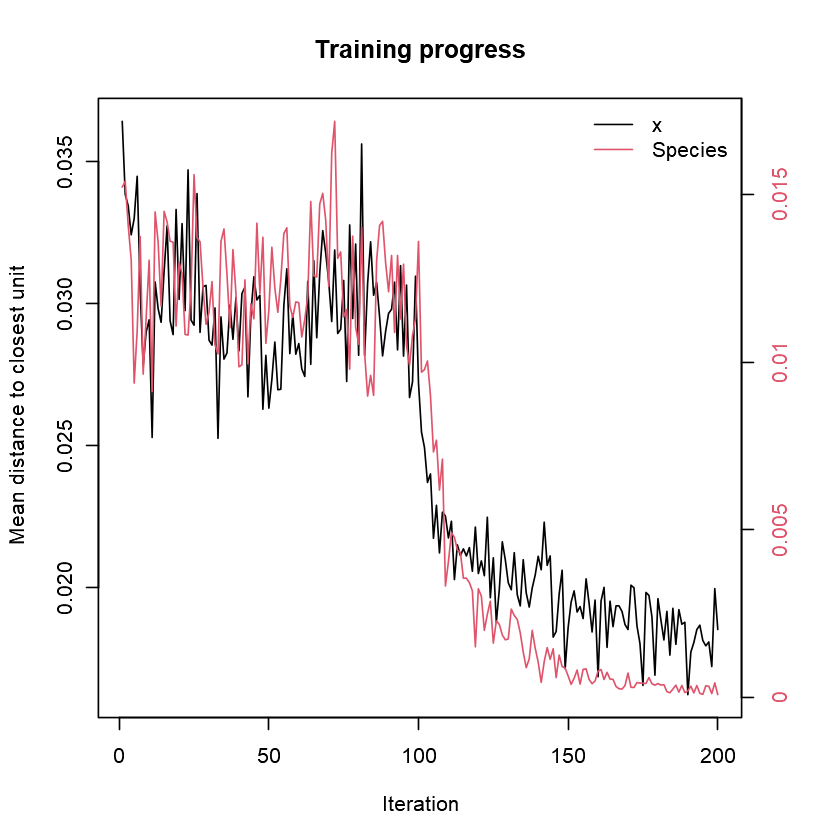

In [19]:
plot(ss, type = "changes")
# 이것은 rlen을 조작해야 하는지 여부를 나타냅니다.

- plot() 함수의 type를 "count"로 지정하면 학습된 som 모델의 각 뉴런이 몇 개의 학습 데이터와 맵핑이 되는 지를 그림으로 확인할 수 있습니다. 
- 이를 통해 som 모델의 질(quality)를 평가할 수 있는 하나의 지표가 됩니다. 즉 이상적으로 각 뉴런이 비슷한 갯수의 학습데이터와 맵핑이 되는 것이 좋으며 반대로 맵핑이 되지 않는 뉴런이 있다면 som 모델의 신경망 크기가 크다는 것는 것을 의미합니다. 

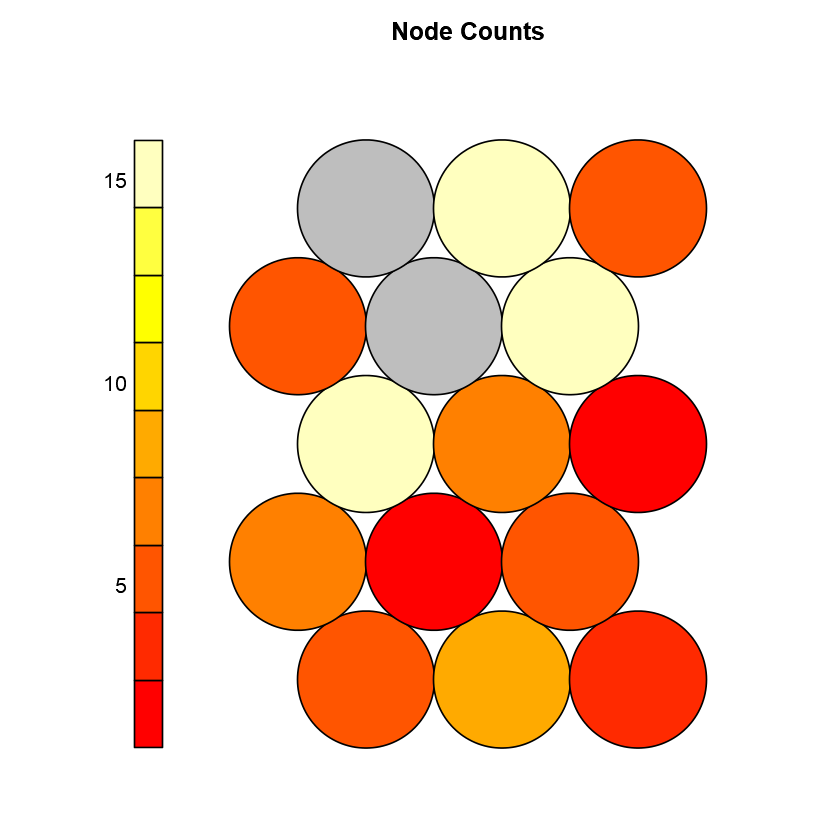

In [26]:
plot(ss, type="count", main="Node Counts")
# 훈련 중 가장 가까운 코드북 벡터까지의 평균 거리를 표시합니다. 3개의 고원이 보입니다.
# 어떤 노드에 많은 관측치가 있습니까?

- plot() 함수의 type를 "dist.neighbours"로 설정하면 통상 통합거리메트릭스(U-matrix)를 그릴 수 있습니다. U-matirx는 각 뉴런의 이웃간 거리를 나타냅니다. 
- 값이 높을 수록 그 뉴런은 이웃뉴런와 비유사(dissimilar)하다고 할 수 있습니다.(0에 가까움 = 좋은 품질.)

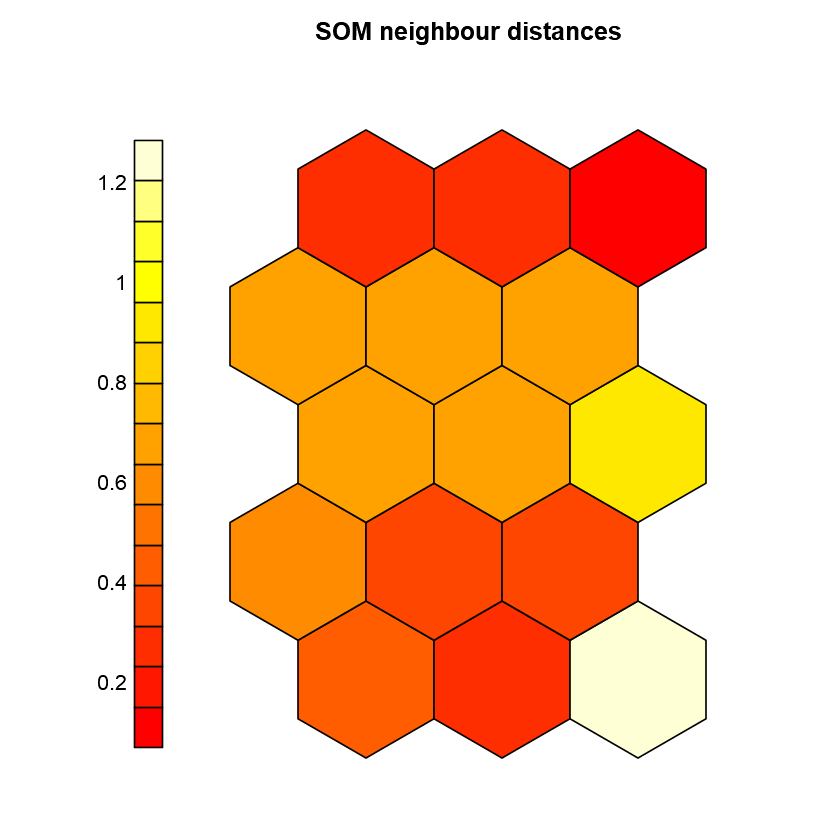

In [66]:
plot(ss, type="dist.neighbours", 
     shape = "straight", main = "SOM neighbour distances")

- plot() 함수의 type를 codes로 설정하면 각 뉴런에 대한 학습 데이터의 가중치 기여율을 확인할 수 있습니다.7) 아래그림처럼 각 뉴런에서 Species의 속성들 가중치 기여율(Representative)을 알 수 있습니다.

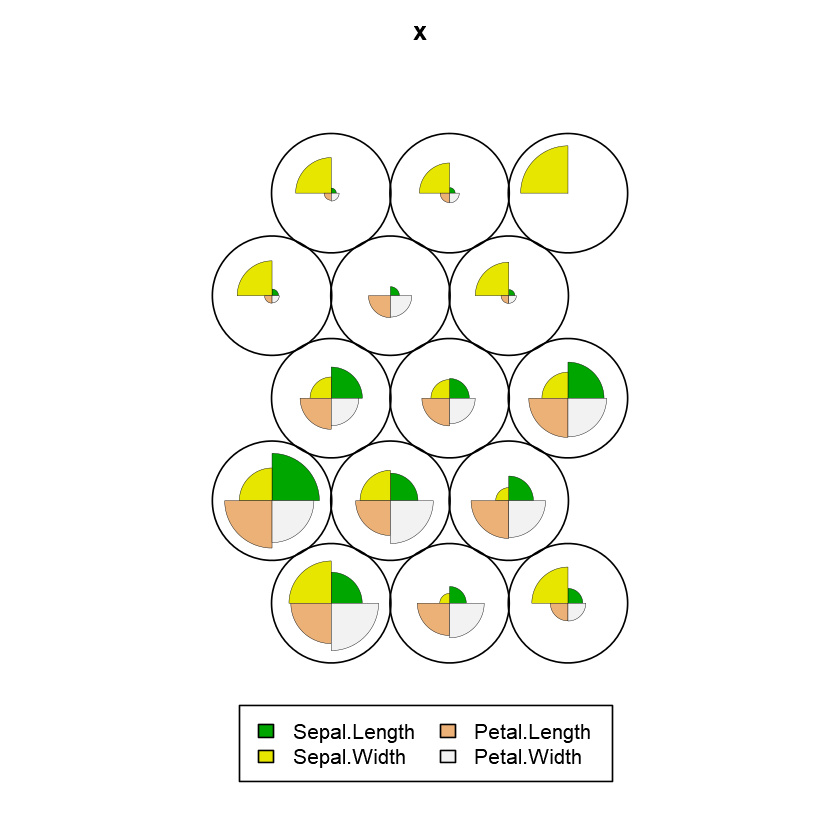

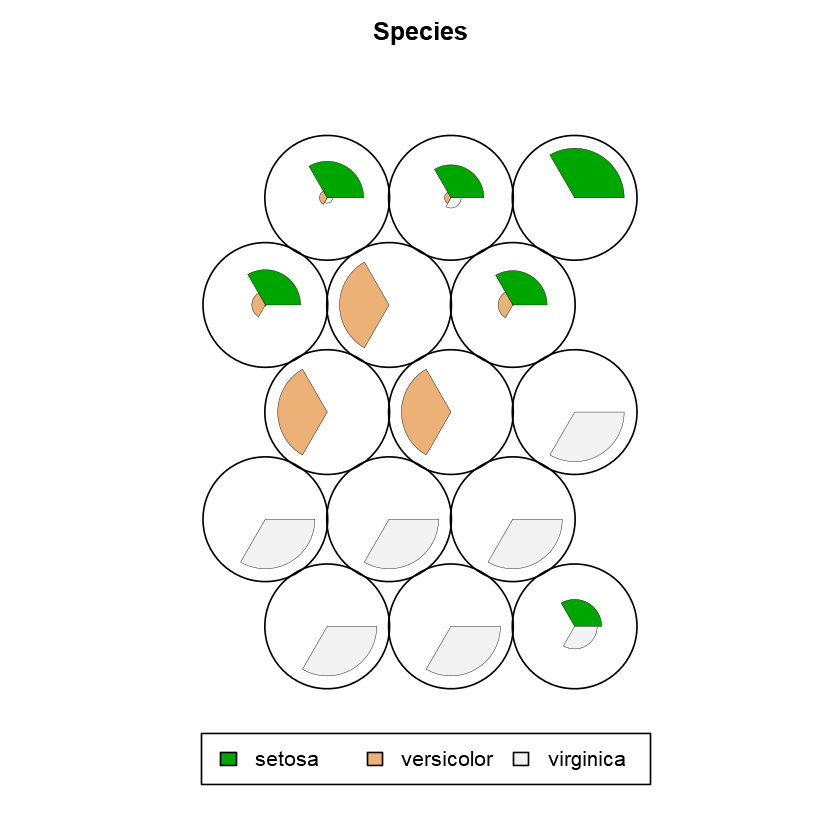

In [72]:
plot(ss, type="codes") # codeRendering = "stars" / "segment" / "line"

- 빈 셀의 수가 적을수록 더 나은 SOM입니다.

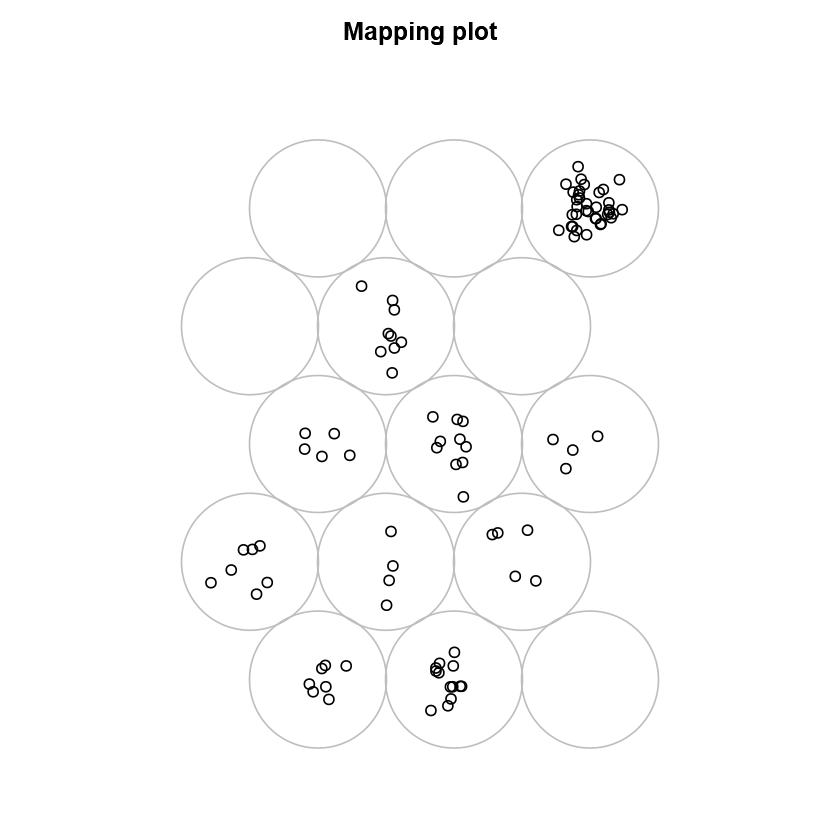

In [74]:
plot(ss, type="mapping", border = "grey")

- supersom() 함수로 som 모델을 학습시켰으며 학습에 사용된 데이터 분류와 모델분류를 확인하기 위해 정오분류표를 그려보면 다음과 같습니다. 

In [30]:
pred <- predict(ss, newdata = test_Set)

In [75]:
table(pred$predictions$Species, test_Set$Species)

            
             setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         26         0
  virginica       0          0        10